In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-10-04 20:50:22.375085: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-10-04 20:50:24.136616: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 20:50:24.137575: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-10-04 20:50:24.590761: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-04 20:50:24.596717: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [8]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key(y_train)

In [9]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13357, 512, 512, 1) (13357, 512, 512, 1) (3409, 512, 512, 1) (3409, 512, 512, 1)


In [10]:
X_train, y_train = C.Helper.filter_slices(X_train, y_train)

(526, 512, 512, 1) (526, 512, 512, 1)


In [11]:
X_train_set = X_train[:last_key]
y_train_set = y_train[:last_key]
X_val = X_train[last_key:]
y_val = y_train[last_key:]

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


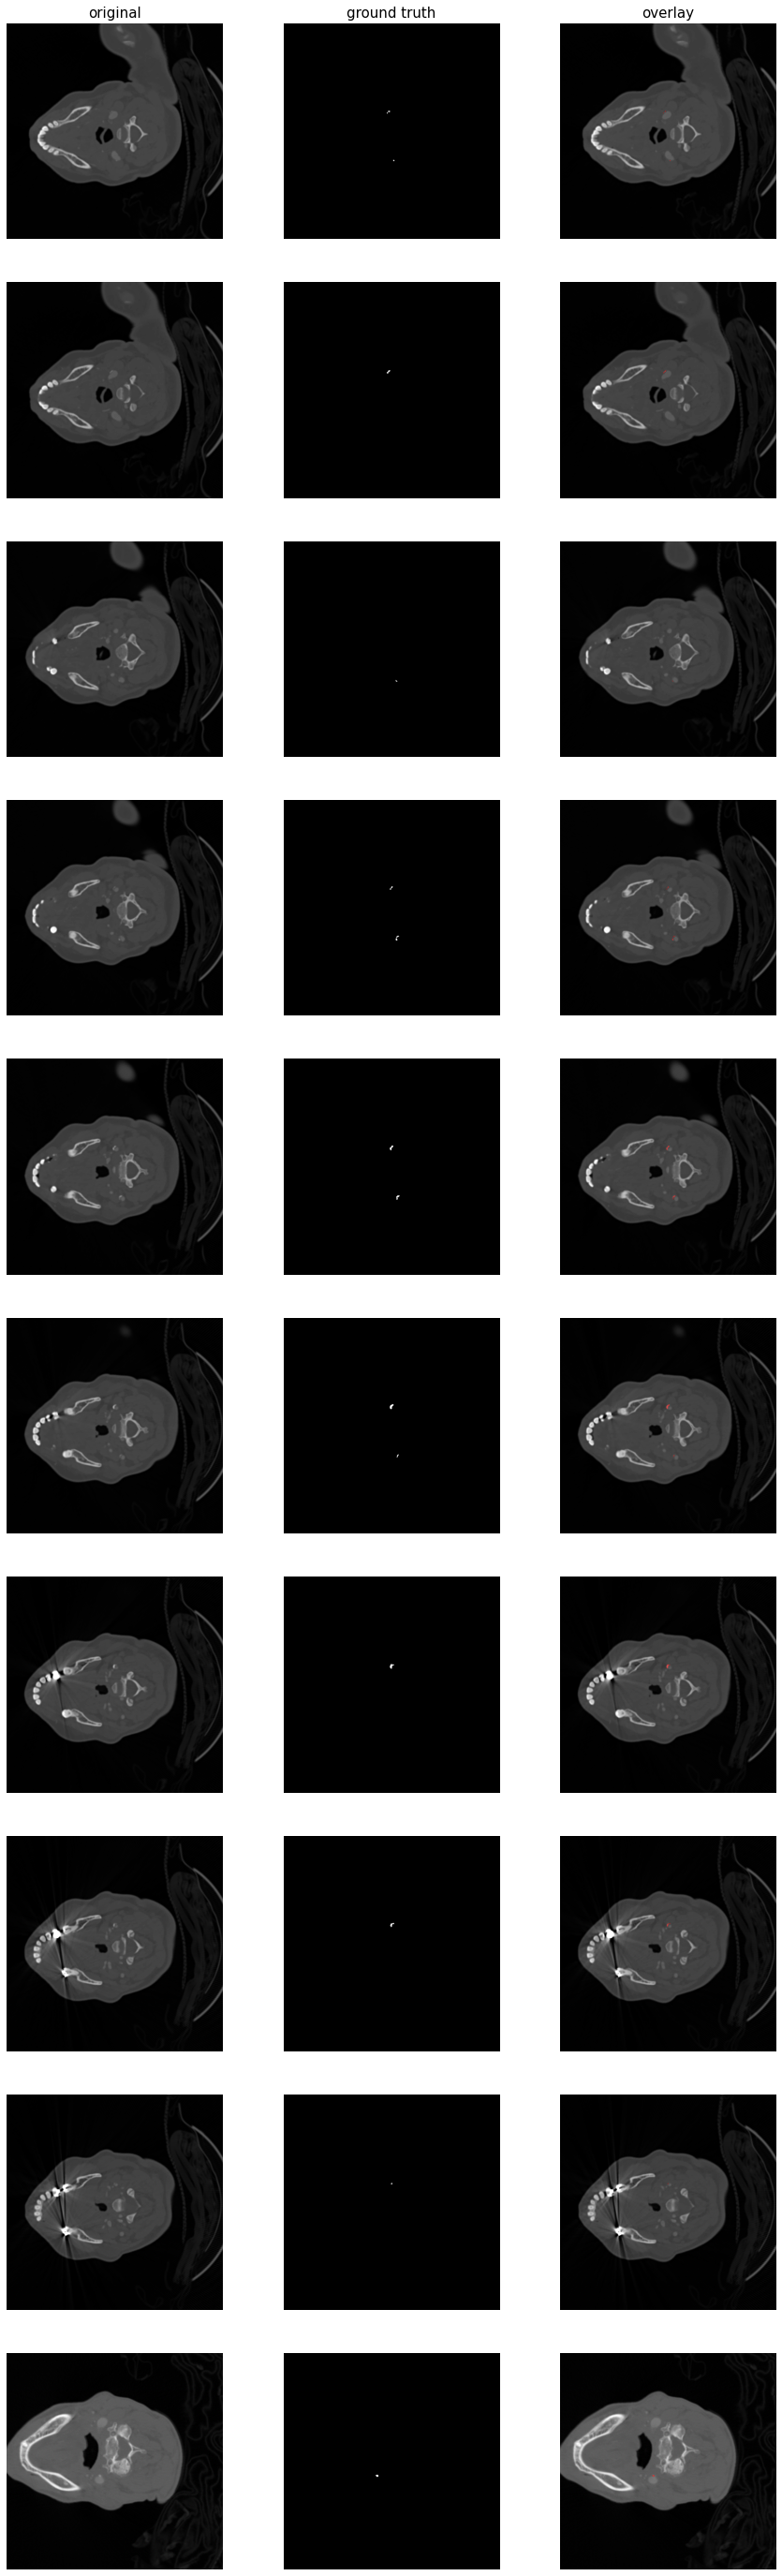

In [12]:
from keras_unet.utils import plot_imgs
plot_imgs(org_imgs=X_train_set, mask_imgs=y_train_set, nm_img_to_plot=10, figsize=5)

In [13]:
train_gen = C.Helper.augment(X_train_set, y_train_set)

In [14]:
model = C.Helper.create_unet(X_train_set[0].shape)

2023-10-04 20:52:57.412649: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-04 20:52:57.415157: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-04 20:52:57.424954: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-10-04 20:52:57.427897: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-04 20:52:57.430600: I tensorflow/core

In [15]:
model, history = C.Helper.train_unet(train_gen, X_train_set, y_train_set, X_val, y_val, model, epochs=200)

2023-10-04 20:52:58.535262: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-10-04 20:52:58.552763: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-10-04 20:52:59.747311: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-10-04 20:53:00.412670: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-10-04 20:53:01.166112: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-10-04 20:53:01.166138: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-10-04 20:53:01.166199: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-10-04 20:53:02.188606: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-10-04 20:53:03.004563: I tensorflow/stream_exec

12/13 [==========================>...] - ETA: 0s - loss: 1.0645 - iou: 1.0110e-04 - iou_thresholded: 6.9671e-04

2023-10-04 20:54:44.646473: W tensorflow/core/common_runtime/bfc_allocator.cc:271] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.39GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


13/13 [==============================] - 164s 8s/step - loss: 1.0006 - iou: 1.2173e-04 - iou_thresholded: 7.0335e-04 - val_loss: 0.1245 - val_iou: 7.7295e-04 - val_iou_thresholded: 0.0010
Epoch 2/200
13/13 [==============================] - 13s 1s/step - loss: 0.0369 - iou: 2.3812e-04 - iou_thresholded: 7.7646e-04 - val_loss: 0.0089 - val_iou: 8.5213e-04 - val_iou_thresholded: 0.0010
Epoch 3/200
13/13 [==============================] - 13s 1s/step - loss: 0.0047 - iou: 4.3217e-04 - iou_thresholded: 8.1992e-04 - val_loss: 0.0022 - val_iou: 2.9180e-04 - val_iou_thresholded: 0.0010
Epoch 4/200
13/13 [==============================] - 13s 1s/step - loss: 0.0019 - iou: 3.7165e-04 - iou_thresholded: 8.1594e-04 - val_loss: 0.0018 - val_iou: 4.7257e-04 - val_iou_thresholded: 0.0010
Epoch 5/200
13/13 [==============================] - 13s 1s/step - loss: 0.0017 - iou: 4.6675e-04 - iou_thresholded: 8.1630e-04 - val_loss: 0.0017 - val_iou: 5.9045e-04 - val_iou_thresholded: 0.0010
Epoch 6/200
13/1

13/13 [==============================] - 13s 1s/step - loss: 3.5981e-04 - iou: 0.1778 - iou_thresholded: 0.0450 - val_loss: 9.8623e-04 - val_iou: 0.0767 - val_iou_thresholded: 0.0122
Epoch 43/200
13/13 [==============================] - 13s 1s/step - loss: 3.4287e-04 - iou: 0.1927 - iou_thresholded: 0.1241 - val_loss: 7.5618e-04 - val_iou: 0.1096 - val_iou_thresholded: 0.0727
Epoch 44/200
13/13 [==============================] - 13s 1s/step - loss: 3.3863e-04 - iou: 0.2081 - iou_thresholded: 0.2075 - val_loss: 7.8939e-04 - val_iou: 0.1207 - val_iou_thresholded: 0.0904
Epoch 45/200
13/13 [==============================] - 13s 1s/step - loss: 3.1060e-04 - iou: 0.2279 - iou_thresholded: 0.2988 - val_loss: 0.0011 - val_iou: 0.0927 - val_iou_thresholded: 0.0731
Epoch 46/200
13/13 [==============================] - 13s 1s/step - loss: 3.0401e-04 - iou: 0.2425 - iou_thresholded: 0.3525 - val_loss: 0.0013 - val_iou: 0.1009 - val_iou_thresholded: 0.0927
Epoch 47/200
13/13 [=====================

13/13 [==============================] - 13s 1s/step - loss: 1.1288e-04 - iou: 0.6301 - iou_thresholded: 0.7272 - val_loss: 0.0021 - val_iou: 0.2628 - val_iou_thresholded: 0.2851
Epoch 85/200
13/13 [==============================] - 13s 999ms/step - loss: 1.1190e-04 - iou: 0.6420 - iou_thresholded: 0.7367 - val_loss: 0.0018 - val_iou: 0.2611 - val_iou_thresholded: 0.2831
Epoch 86/200
13/13 [==============================] - 13s 1s/step - loss: 1.0570e-04 - iou: 0.6500 - iou_thresholded: 0.7508 - val_loss: 0.0033 - val_iou: 0.2332 - val_iou_thresholded: 0.2511
Epoch 87/200
13/13 [==============================] - 13s 1s/step - loss: 1.0547e-04 - iou: 0.6594 - iou_thresholded: 0.7474 - val_loss: 0.0030 - val_iou: 0.2461 - val_iou_thresholded: 0.2641
Epoch 88/200
13/13 [==============================] - 13s 1s/step - loss: 1.0398e-04 - iou: 0.6581 - iou_thresholded: 0.7499 - val_loss: 0.0023 - val_iou: 0.2640 - val_iou_thresholded: 0.2875
Epoch 89/200
13/13 [==============================

13/13 [==============================] - 13s 1000ms/step - loss: 1.4557e-04 - iou: 0.5701 - iou_thresholded: 0.6790 - val_loss: 0.0027 - val_iou: 0.1545 - val_iou_thresholded: 0.1656
Epoch 127/200
13/13 [==============================] - 13s 1s/step - loss: 1.5056e-04 - iou: 0.5672 - iou_thresholded: 0.6753 - val_loss: 0.0021 - val_iou: 0.2244 - val_iou_thresholded: 0.2505
Epoch 128/200
13/13 [==============================] - 13s 998ms/step - loss: 1.4012e-04 - iou: 0.5849 - iou_thresholded: 0.6951 - val_loss: 0.0017 - val_iou: 0.2412 - val_iou_thresholded: 0.2676
Epoch 129/200
13/13 [==============================] - 13s 1s/step - loss: 1.3715e-04 - iou: 0.5817 - iou_thresholded: 0.6933 - val_loss: 0.0020 - val_iou: 0.2083 - val_iou_thresholded: 0.2344
Epoch 130/200
13/13 [==============================] - 13s 1s/step - loss: 1.3406e-04 - iou: 0.5988 - iou_thresholded: 0.7043 - val_loss: 0.0018 - val_iou: 0.2439 - val_iou_thresholded: 0.2702
Epoch 131/200
13/13 [=====================

13/13 [==============================] - 13s 1s/step - loss: 8.2570e-05 - iou: 0.7184 - iou_thresholded: 0.7941 - val_loss: 0.0031 - val_iou: 0.2547 - val_iou_thresholded: 0.2698
Epoch 169/200
13/13 [==============================] - 13s 1s/step - loss: 8.2266e-05 - iou: 0.7181 - iou_thresholded: 0.7961 - val_loss: 0.0033 - val_iou: 0.2356 - val_iou_thresholded: 0.2481
Epoch 170/200
13/13 [==============================] - 13s 1s/step - loss: 8.1012e-05 - iou: 0.7206 - iou_thresholded: 0.7964 - val_loss: 0.0036 - val_iou: 0.2353 - val_iou_thresholded: 0.2487
Epoch 171/200
13/13 [==============================] - 13s 1s/step - loss: 8.0815e-05 - iou: 0.7192 - iou_thresholded: 0.7981 - val_loss: 0.0033 - val_iou: 0.2714 - val_iou_thresholded: 0.2880
Epoch 172/200
13/13 [==============================] - 13s 1s/step - loss: 7.7915e-05 - iou: 0.7262 - iou_thresholded: 0.8028 - val_loss: 0.0033 - val_iou: 0.2593 - val_iou_thresholded: 0.2723
Epoch 173/200
13/13 [============================

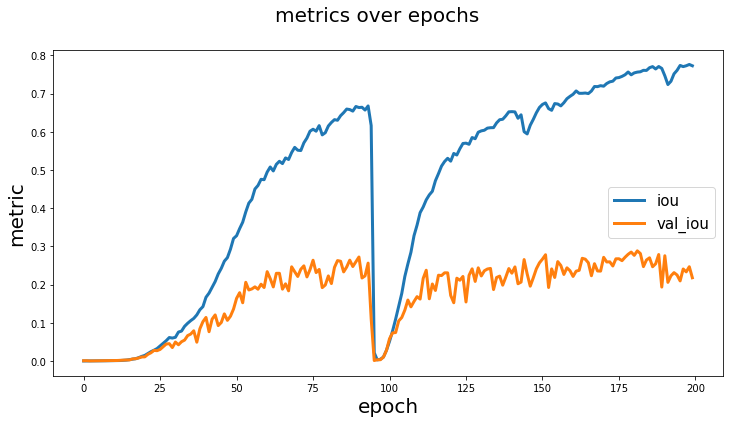

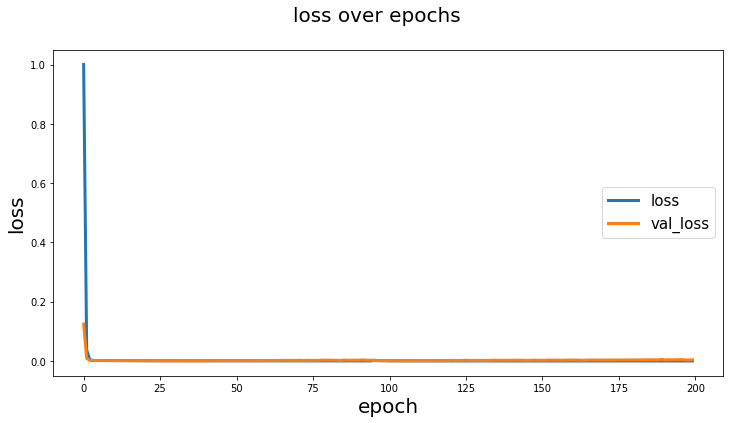

In [16]:
C.Helper.visualize_graph(history)

In [17]:
y_pred = C.Helper.prediction(X_test, model)

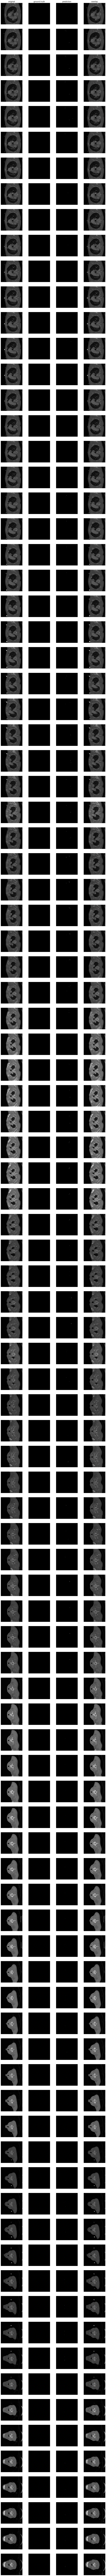

In [18]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [19]:
C.Helper.evaluate(X_test, y_test, model)

107/107 [==============================] - 24s 223ms/step - loss: 6.2637e-04 - iou: 0.1117 - iou_thresholded: 0.1289
